### Author: Ashish Kumar Jha

# This is a simple linear regresssion task

Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

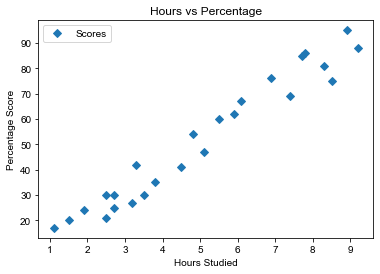

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='D')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
sns.set(style="whitegrid")
plt.show()

In [4]:
x= s_data.iloc[:, :-1].values
y= s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2, random_state=0)

### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Successful.")

Training Successful.


In [7]:
print(regressor.intercept_)

2.0181600414346974


In [8]:
print(regressor.coef_)

[9.91065648]


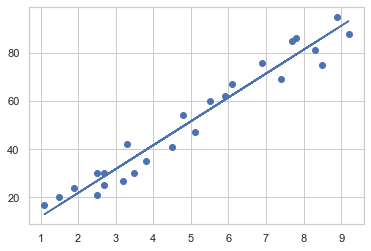

In [9]:
#plotting the regression line
line = regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(x_test) #Testing data in Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
#Comparing Actual vs Predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# You can also test with your own data
hours = 5.5
own_pred = regressor.predict(np.array(hours).reshape(1, 1))

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 5.5
Predicted Score = 56.526770684966976


The error itself solves your problem. Just follow what it says. The predict() method takes a 2d array of values you want to predict on. Each item in the array is a "point" you want your model to predict on. So try,
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

or

lin_reg_2.predict(np.array([6.5]).reshape(1, 1))

### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


### Task Completed